In [12]:
# Import Python Packages
# !pip install -U kaleido
!pip install kaleido

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

import plotly.express as px
import plotly.io as pio
px.defaults.width = 700
px.defaults.height = 500

plt.style.use(['seaborn-talk','dark_background',])
# pio.templates.default='plotly_dark'

     --------------------------------------- 65.9/65.9 MB 43.7 MB/s eta 0:00:00


In [17]:
# Import data and export to csv file
king = pd.read_csv('data/kings_county_data.csv')
display(king.head(2))
# Additional setup for Python figs
king.rename({'long':'lon'},axis=1,inplace=True)
king['waterfront'] = king['waterfront'].astype(str)
king.info()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  

[2 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  lon   

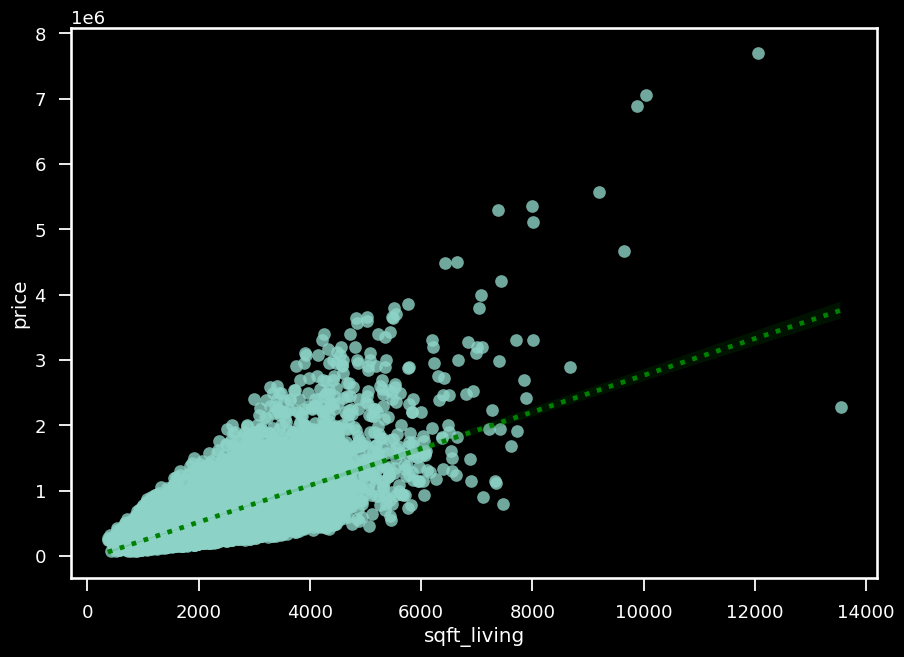

In [19]:
# Scatterplot
# Seaborn
sns.regplot(data=king, x='sqft_living',y='price',
            line_kws={'color':'green',"ls":':'});
# Plotly
px.scatter(king, x='sqft_living',y='price',trendline='ols',
           trendline_color_override='green')


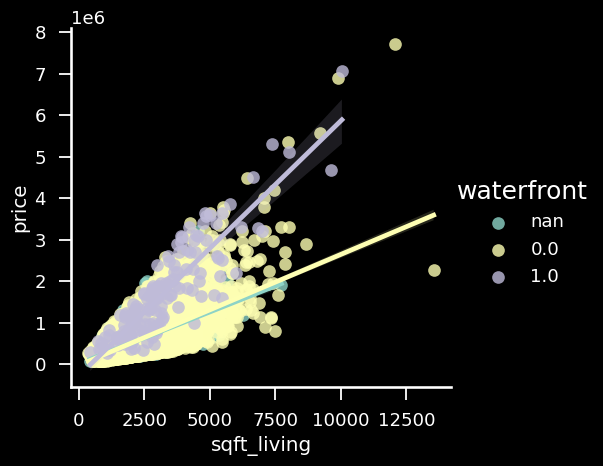

In [20]:
# Python Answer - Seaborn
sns.lmplot(data=king, x='sqft_living',y='price',hue='waterfront');

# Python Answer - Plotly
px.scatter(king, x='sqft_living',y='price',color='waterfront',trendline='ols',
           trendline_color_override='green')


In [ ]:
# Python Answer - Seaborn
sns.histplot(king,x='price',binwidth=100_000);

# Python Answer - Plotly

# must calculate n_bins
n_bins=77
king['price'].max()/n_bins
px.histogram(king,x='price',nbins=n_bins,width=800)